# Projet Data IA - La Maladie d'Alzheimer
### Léa Bchouty - Chahinez Mezouar - Emma Stievenard

## Préambule

Importer les bibliothèques nécessaires

In [148]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import squarify




In [149]:
df = pd.read_csv('alzheimers_disease_data.csv')

Informations sur les colonnes du data frame

In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 non-null   int64

In [151]:
df.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid


## Nettoyage du Data Frame

Vérifier que l'on a pas des valeurs NaN

In [152]:
pd.isna(df).sum()

PatientID                    0
Age                          0
Gender                       0
Ethnicity                    0
EducationLevel               0
BMI                          0
Smoking                      0
AlcoholConsumption           0
PhysicalActivity             0
DietQuality                  0
SleepQuality                 0
FamilyHistoryAlzheimers      0
CardiovascularDisease        0
Diabetes                     0
Depression                   0
HeadInjury                   0
Hypertension                 0
SystolicBP                   0
DiastolicBP                  0
CholesterolTotal             0
CholesterolLDL               0
CholesterolHDL               0
CholesterolTriglycerides     0
MMSE                         0
FunctionalAssessment         0
MemoryComplaints             0
BehavioralProblems           0
ADL                          0
Confusion                    0
Disorientation               0
PersonalityChanges           0
DifficultyCompletingTasks    0
Forgetfu

Vérifier que l'on a pas de doublons

In [153]:
sum(df.duplicated())

0

Vérifier que l'on a pas des valeurs aberrantes

In [154]:
df.max()

PatientID                          6899
Age                                  90
Gender                                1
Ethnicity                             3
EducationLevel                        3
BMI                           39.992767
Smoking                               1
AlcoholConsumption            19.989293
PhysicalActivity               9.987429
DietQuality                    9.998346
SleepQuality                    9.99984
FamilyHistoryAlzheimers               1
CardiovascularDisease                 1
Diabetes                              1
Depression                            1
HeadInjury                            1
Hypertension                          1
SystolicBP                          179
DiastolicBP                         119
CholesterolTotal             299.993352
CholesterolLDL               199.965665
CholesterolHDL                99.980324
CholesterolTriglycerides     399.941862
MMSE                          29.991381
FunctionalAssessment           9.996467


In [155]:
df.min()

PatientID                          4751
Age                                  60
Gender                                0
Ethnicity                             0
EducationLevel                        0
BMI                           15.008851
Smoking                               0
AlcoholConsumption             0.002003
PhysicalActivity               0.003616
DietQuality                    0.009385
SleepQuality                   4.002629
FamilyHistoryAlzheimers               0
CardiovascularDisease                 0
Diabetes                              0
Depression                            0
HeadInjury                            0
Hypertension                          0
SystolicBP                           90
DiastolicBP                          60
CholesterolTotal             150.093316
CholesterolLDL                50.230707
CholesterolHDL                20.003434
CholesterolTriglycerides      50.407194
MMSE                           0.005312
FunctionalAssessment            0.00046


Supprimer la colonne 'DoctorInCharge' vu qu'on trouve les données inutiles et identiques dans tout le dataframe

In [156]:
df_cleaned = df
df_cleaned.drop('DoctorInCharge', axis = 1, inplace = True)

In [157]:
df_cleaned.columns

Index(['PatientID', 'Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI',
       'Smoking', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality',
       'SleepQuality', 'FamilyHistoryAlzheimers', 'CardiovascularDisease',
       'Diabetes', 'Depression', 'HeadInjury', 'Hypertension', 'SystolicBP',
       'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL',
       'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment',
       'MemoryComplaints', 'BehavioralProblems', 'ADL', 'Confusion',
       'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks',
       'Forgetfulness', 'Diagnosis'],
      dtype='object')

Sauvegarder tout dans un nouveau fichier CSV

In [158]:
df_cleaned.to_csv('modified_alzheimers_disease_data.csv')

## Analyse des Données

Afficher quelques nombres en statistiques, une analyse descriptive des variables

In [159]:
# Vu que PatientID représente l'identifiant unique de chaque patient, on n'a pas besoin de le garder dans les statistiques, soit calculer la moyenne, la médiane, l'écart-type, le min et le max
df_cleaned.describe().drop('PatientID', axis = 1)

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
count,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,...,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000
mean,74.908795,0.506282,0.697534,1.286645,27.655697,0.288506,10.039442,4.920202,4.993138,7.051081,...,5.080055,0.208004,0.156817,4.982958,0.205212,0.158213,0.150768,0.158678,0.301536,0.353653
std,8.990221,0.500077,0.996128,0.904527,7.217438,0.453173,5.757910,2.857191,2.909055,1.763573,...,2.892743,0.405974,0.363713,2.949775,0.403950,0.365026,0.357906,0.365461,0.459032,0.478214
min,60.000000,0.000000,0.000000,0.000000,15.008851,0.000000,0.002003,0.003616,0.009385,4.002629,...,0.000460,0.000000,0.000000,0.001288,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,67.000000,0.000000,0.000000,1.000000,21.611408,0.000000,5.139810,2.570626,2.458455,5.482997,...,2.566281,0.000000,0.000000,2.342836,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,75.000000,1.000000,0.000000,1.000000,27.823924,0.000000,9.934412,4.766424,5.076087,7.115646,...,5.094439,0.000000,0.000000,5.038973,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,83.000000,1.000000,1.000000,2.000000,33.869778,1.000000,15.157931,7.427899,7.558625,8.562521,...,7.546981,0.000000,0.000000,7.581490,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,90.000000,1.000000,3.000000,3.000000,39.992767,1.000000,19.989293,9.987429,9.998346,9.999840,...,9.996467,1.000000,1.000000,9.999747,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Visualisation des distributions et tendances

#### Visualisations sur Python

##### Histogramme pour l'âge


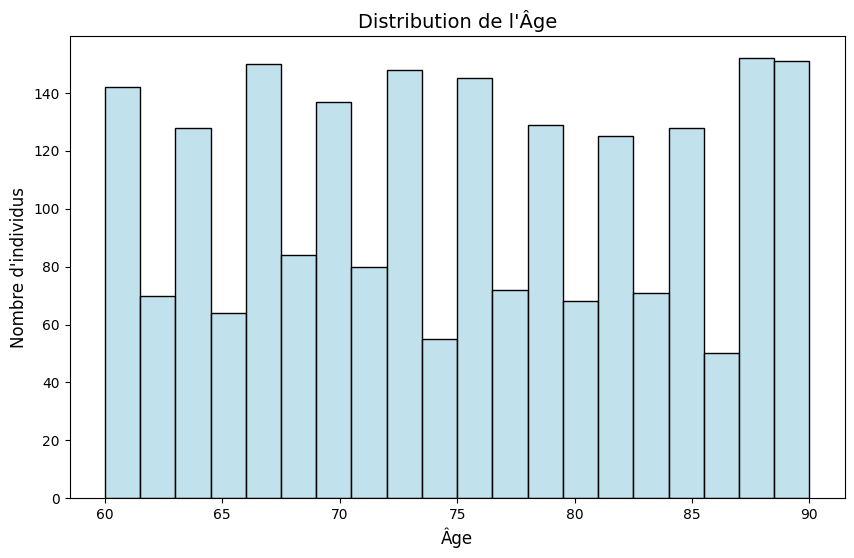

In [160]:
# Création de l'histogramme
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned["Age"], bins=20, color="lightblue")

# Ajout des titres et labels
plt.title("Distribution de l'Âge", fontsize=14)
plt.xlabel("Âge", fontsize=12)
plt.ylabel("Nombre d'individus", fontsize=12)

# Affichage du graphique
plt.show()


##### Diagramme en barre diagnostiques (1 ou 0)

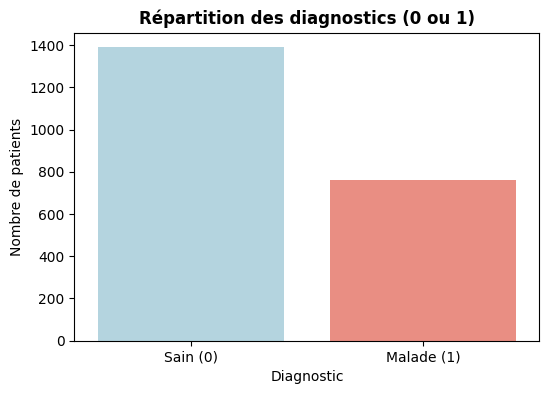

In [161]:

# Compter les valeurs 0 et 1
diagnosis_counts = df_cleaned["Diagnosis"].value_counts()

# Appliquer un style light

# Création du diagramme en barres
plt.figure(figsize=(6, 4))
sns.barplot(x=diagnosis_counts.index, y=diagnosis_counts.values, palette=["lightblue", "salmon"])

# Ajout des labels et titre
plt.xlabel("Diagnostic", fontsize=10)
plt.ylabel("Nombre de patients", fontsize=10)
plt.title("Répartition des diagnostics (0 ou 1)", fontsize=12, fontweight="bold")
plt.xticks([0, 1], ["Sain (0)", "Malade (1)"])  # Légendes plus claires

# Affichage du graphique
plt.show()


##### Camembert pour la répartition du genre

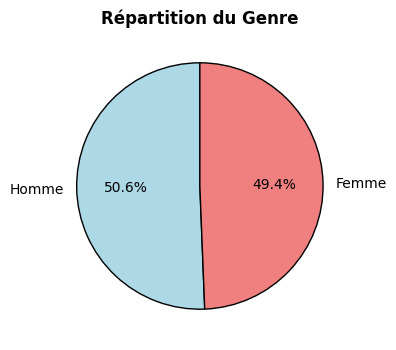

In [162]:
# Compter les occurrences pour chaque genre
gender_counts = df_cleaned["Gender"].value_counts()

# Labels
labels = ["Homme", "Femme"]  # Adapté selon les données (0 = Homme, 1 = Femme par ex.)
colors = ["lightblue", "lightcoral"]  # Couleurs légères

# Création du camembert
plt.figure(figsize=(4, 4))
plt.pie(gender_counts, labels=labels, autopct="%1.1f%%", colors=colors, startangle=90, wedgeprops={"edgecolor": "black"})

# Ajouter un titre
plt.title("Répartition du Genre", fontsize=12, fontweight="bold")

# Afficher le graphique
plt.show()

##### Treemap pour l’ethnicité

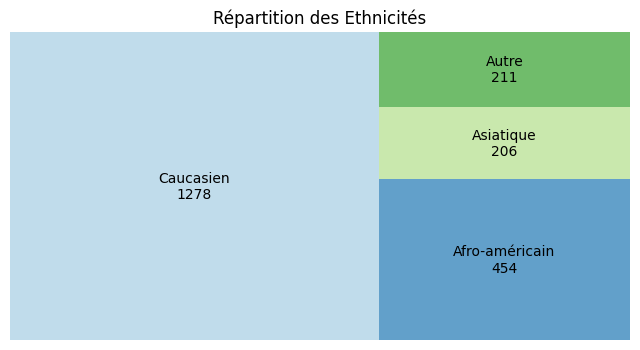

In [163]:
# Mapping des codes à leurs labels
ethnicity_labels = {0: "Caucasien", 1: "Afro-américain", 2: "Asiatique", 3: "Autre"}

# Compter les occurrences de chaque ethnie
ethnicity_counts = df_cleaned["Ethnicity"].value_counts().sort_index()

# Créer des labels avec les noms des groupes et leurs effectifs
labels = [f"{ethnicity_labels[i]}\n{count}" for i, count in zip(ethnicity_counts.index, ethnicity_counts.values)]

# Création du treemap
plt.figure(figsize=(8, 4))
squarify.plot(sizes=ethnicity_counts.values, label=labels, alpha=0.7, color=plt.cm.Paired.colors)

# Ajouter un titre
plt.title("Répartition des Ethnicités")

# Supprimer les axes
plt.axis('off')

# Afficher le graphique
plt.show()

##### Diagramme à barre pour l’éducation


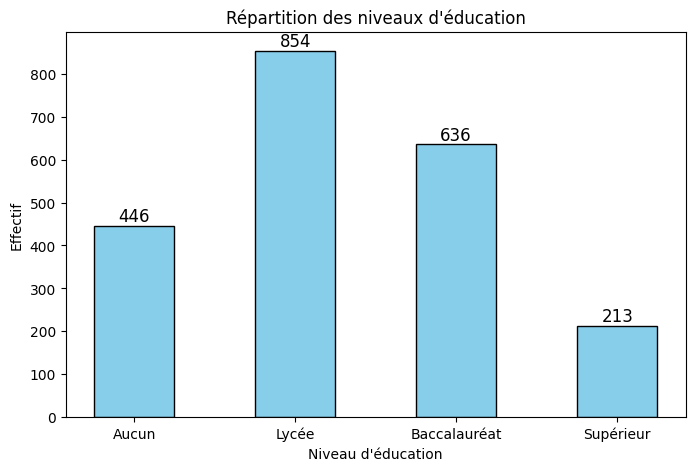

In [164]:
# Mapping des codes à leurs labels
education_labels = {0: "Aucun", 1: "Lycée", 2: "Baccalauréat", 3: "Supérieur"}

# Compter les occurrences de chaque niveau d'éducation
education_counts = df_cleaned["EducationLevel"].value_counts().sort_index()

# Création du diagramme à barres
plt.figure(figsize=(8, 5))
bars = plt.bar([education_labels[i] for i in education_counts.index], education_counts.values, color='skyblue', edgecolor='black',width=0.5)

# Ajouter les étiquettes sur les barres
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), str(bar.get_height()), ha='center', va='bottom', fontsize=12)

# Ajouter un titre et des labels
plt.title("Répartition des niveaux d'éducation")
plt.xlabel("Niveau d'éducation")
plt.ylabel("Effectif")

# Afficher le graphique
plt.show()

#### Visualisations sur PowerBI

## Construction des Modèles Prédictifs

### Corrélations entre colonnes

Importer les bibliothèques nécessaires

In [165]:
import warnings
warnings.filterwarnings('ignore')

Afficher le nombre de patients non-atteints (0) et atteints (1) de la maladie d'Alzheimer

In [166]:
df_cleaned['Diagnosis'].value_counts()

Diagnosis
0    1389
1     760
Name: count, dtype: int64

Matrice de corrélation

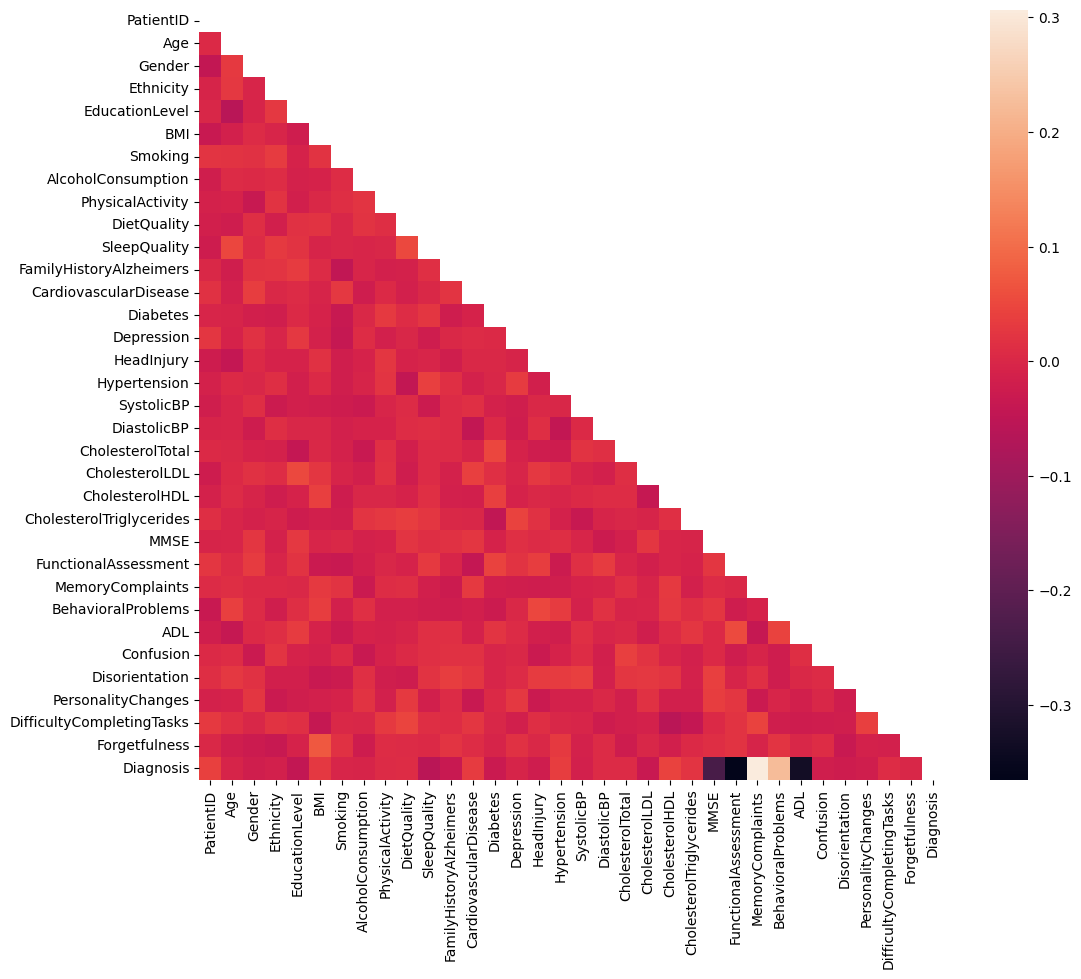

In [167]:
# Créer un mask pour faire apparaitre le triangle
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), mask=mask)

plt.show()

Colonnes avec fortes corrélations

<Axes: >

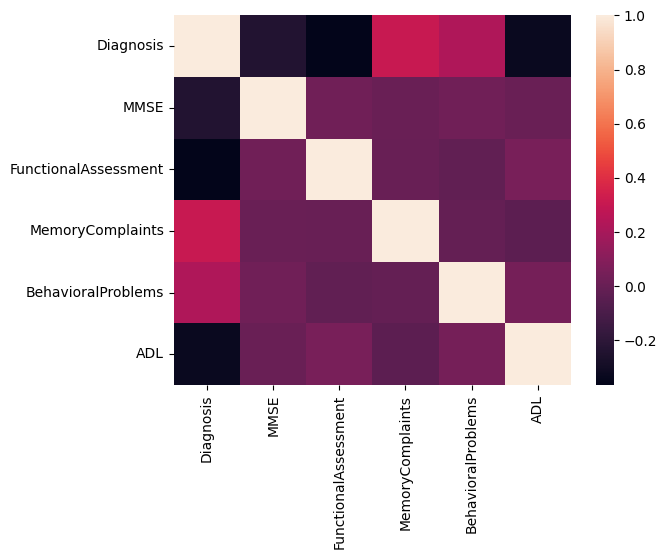

In [168]:
df_heatmap = df_cleaned[['Diagnosis', 'MMSE', 'FunctionalAssessment', 'MemoryComplaints', 'BehavioralProblems', 'ADL']]
sns.heatmap(df_heatmap.corr())

### K-Nearest Neighbors (KNN)

#### Implementation de l'algorithme KNN

Diviser l'ensemble en x (caractéristiques) et y (variable cible) et indiquer le ratio d'entrainement et de test

In [169]:
from sklearn.preprocessing import StandardScaler
x = df.drop('Diagnosis', axis=1)
y = df['Diagnosis']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.10, random_state=42)

Standardiser les variables

In [170]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

Méthode de Elbow pour trouver la meilleure valeur de K

In [171]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
error_rate = []

K = 60

for i in range(1, K):
    knn = KNeighborsClassifier(n_neighbors=i)

    knn.fit(x_train,y_train)

    pred_i = knn.predict(x_test)

    test_error = 1 - accuracy_score(y_test,pred_i)
    error_rate.append(test_error)

Tracer l'évolution du taux d'erreur en fonction de la valeur de k

Text(0, 0.5, 'Error Rate')

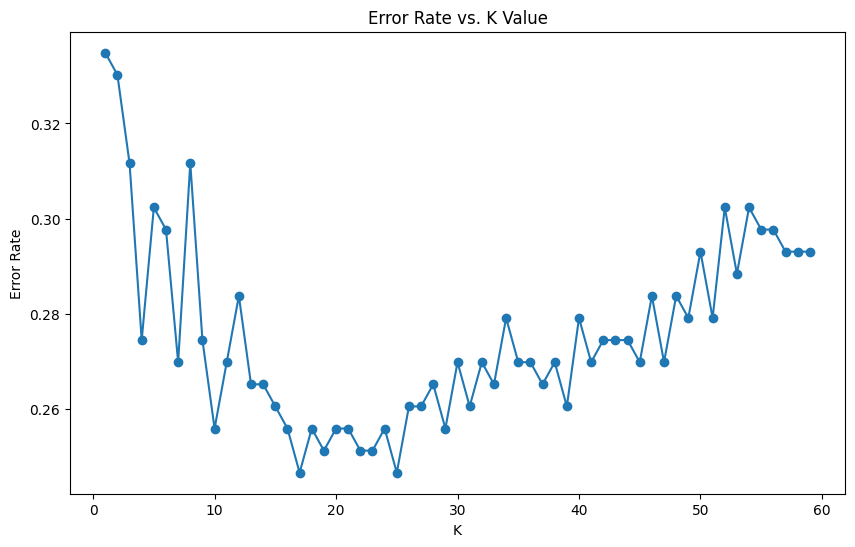

In [172]:
plt.figure(figsize=(10,6))
plt.plot(range(1,60),error_rate, marker='o')
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Utilisation de la meilleure valeur de K

In [177]:
from sklearn.metrics import precision_score
knn = KNeighborsClassifier(n_neighbors = 10)

knn.fit(x_train, y_train)
pred = knn.predict(x_test)

print('Avec K=10')
print('\n')
print(confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test, pred))

Avec K=10


[[131  11]
 [ 44  29]]


              precision    recall  f1-score   support

           0       0.75      0.92      0.83       142
           1       0.72      0.40      0.51        73

    accuracy                           0.74       215
   macro avg       0.74      0.66      0.67       215
weighted avg       0.74      0.74      0.72       215

